# Aarti Sharma 
GRIP Internship (Data Science and Business Analytics) at The Spark Foundation

# Task 1 - Prediction using supervised machine learning

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split               ########### for spliting in train and test dataset
from sklearn.linear_model import LinearRegression                  #### for performing linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

# Uploading the data

In [2]:
data=pd.read_csv('http://bit.ly/w-data')                           ####uploading data
print(data)
print('Data imported successfully')

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Data imported successfully


# Exploratory Data Analysis

In [3]:
data.head()   ### To see only upper 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape   #### To know about the number of rows and columns

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 2-D Visualization of dataset

Text(0.5, 1.0, 'Hours Vs Scores')

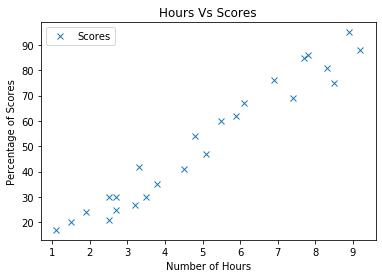

In [6]:
# Plotting the graph of distribution of scores with respect to no of hours
data.plot(x='Hours',y='Scores',style='x')
plt.xlabel ('Number of Hours')
plt.ylabel('Percentage of Scores')
plt.title('Hours Vs Scores')

# Preparation of data

In [7]:
### 1.## Definig input and output variavles
input=data.iloc[:, :-1].values
print(input)
output=data.iloc[:, 1].values 
print(output)

### 2.## Splitting data into training(80%) and test(20%) dataset
X_train, X_test, y_train, y_test = train_test_split(input,output, 
                            test_size=0.2, random_state=0) 
print('Data splitted successfully')

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
Data splitted successfully


In [8]:
### 3.## Model fitting(linear regression)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print('Training of data is completed')

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)

# The coefficients
print('Coefficients: ', regr.coef_)

## The intercept
print('intercept:', regr.intercept_)


Training of data is completed
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Coefficients:  [9.91065648]
intercept: 2.018160041434683


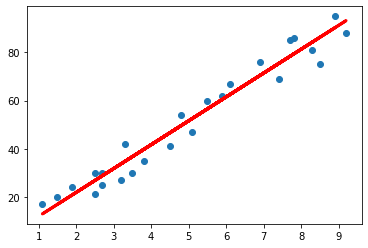

In [9]:
## 4.## Plotting for the test data
plt.scatter(input, output)
line = regr.coef_*input+regr.intercept_

## 5.### Plotting linear regression
plt.plot(input, line, color='red',linewidth=3);
plt.show()

# Model evaluation

In [10]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred)) ### Check the percentage error (least error)
## lower the value better the model.

# Explained variance score: 1 is perfect prediction
## It ranges from 0-1005
##if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. 
## A low value would show a low level of correlation, meaning a regression model that is not valid
r2='Variance score: %.2f' % r2_score(y_test, y_pred)
print(r2) ## How accurate our data is(variance- difference from predicted value mean) ? 


Mean squared error: 21.60
Variance score: 0.95


# Prediction and Comparison of dataset

In [11]:
#### Prediction and Comparison of test data

print(X_test)    # Testing data
y_pred = regr.predict(X_test)
print("Predicted Score is: ",y_pred) ### predicted values

## Comparison of Actual Vs Predicted 
DF=pd.DataFrame({'Actual Data':y_test,'  Predicted Data':y_pred})
DF

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicted Score is:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


,Actual Data,Predicted Data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the score

In [12]:
### What will be predicted score if a student studies for 9.25 hrs/ day?
hours=9.25
pred=regr.predict([[hours]])
#pred
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Thank You